<a href="https://colab.research.google.com/github/anusha2001-sd/Leaf_Disease_Detection/blob/main/Leaf_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggle_dataset'

In [ ]:
%cd /content/drive/MyDrive/kaggle_dataset

/content/drive/MyDrive/kaggle_dataset


In [ ]:
!ls

kaggle.json  plant-village


In [ ]:
!kaggle datasets download -d kaustubhb999/tomatoleaf

 94% 168M/179M [00:02<00:00, 89.4MB/s]
100% 179M/179M [00:02<00:00, 90.3MB/s]


In [ ]:
!mkdir tomatoleaf


mkdir: cannot create directory ‘tomatoleaf’: File exists


In [ ]:
%cd tomatoleaf/

/content/drive/MyDrive/kaggle_dataset/tomatoleaf


In [ ]:
!unzip tomatoleaf.zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b

In [ ]:
%cd /content/drive/MyDrive/kaggle_dataset/tomatoleaf/tomato

/content/drive/MyDrive/kaggle_dataset/tomatoleaf/tomato


In [ ]:
#!rm -rf Pepper_bell_Bacterial_spot

In [ ]:
!git clone 'https://github.com/y656/Tomato-plant-leaves-classifier-using-transfer-learning.git'

fatal: destination path 'Tomato-plant-leaves-classifier-using-transfer-learning' already exists and is not an empty directory.


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import numpy as np

In [ ]:
IMAGE_SIZE = 224 #Although our input images are 256 *256 we rescale them to 224*224 so we can use mobilenetv2
BATCH_SIZE = 16

In [ ]:
dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/potato_dataset/Potato_dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)

Found 2162 files belonging to 3 classes.


In [ ]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

(16, 224, 224, 3)
[0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 1]


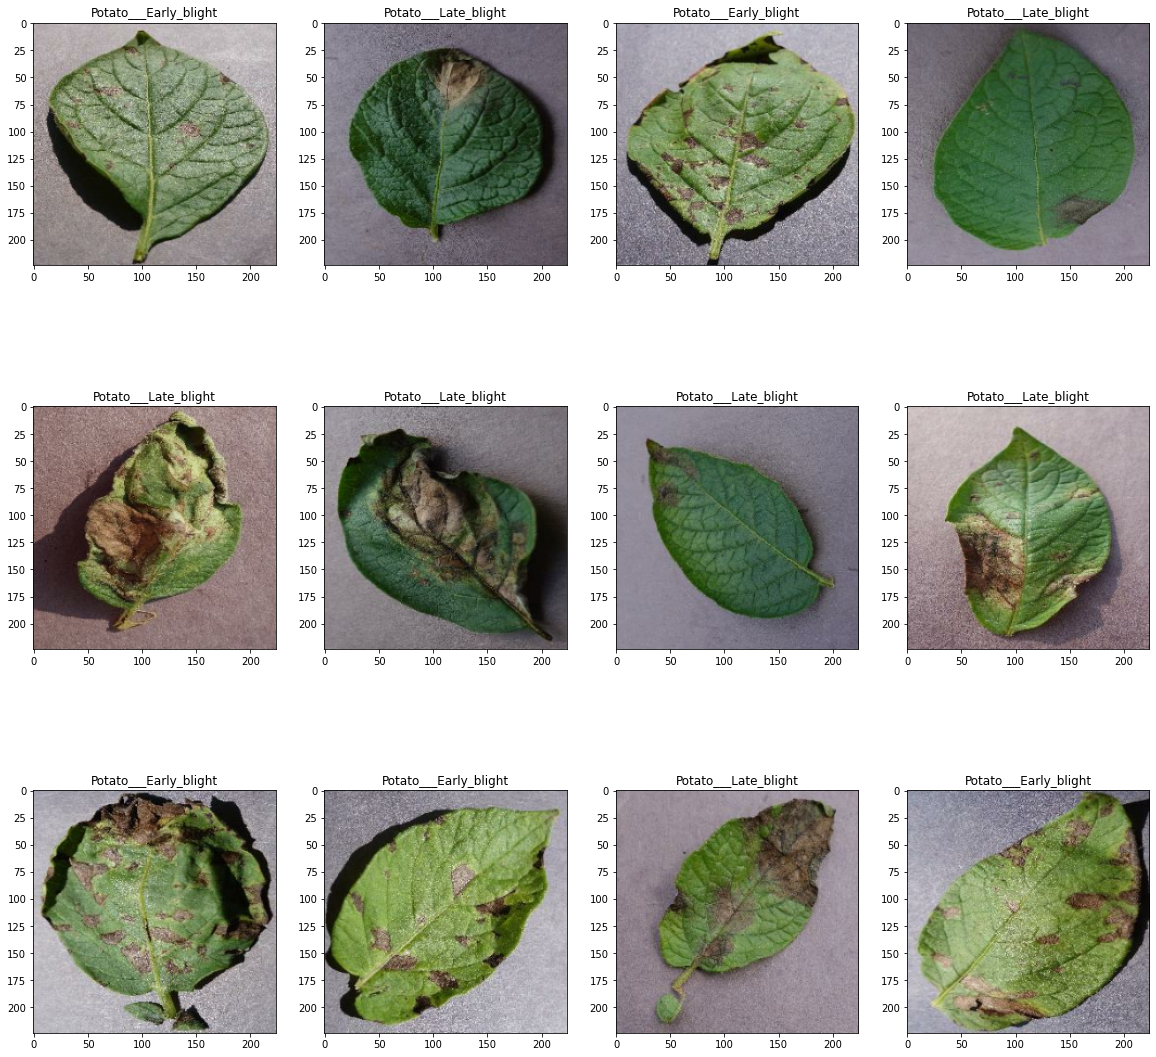

In [ ]:
plt.figure(figsize = (20,20)) # Lets increse plot size of our plots
#Lets explore our batch and display some images
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
    #To visualize all images plot as subplot
        ax = plt.subplot(3,4,i+1)
    #Visualize image using matplotlib imshow function plt.imshow expects a 3D numpy array
        plt.title(class_names[label_batch[i]]) # Displaying its class label as title
        plt.imshow(image_batch[i].numpy().astype('uint8'))
    print(image_batch.shape)
    print(label_batch.numpy())

In [ ]:
y = np.concatenate([y for x, y in dataset], axis=0)
print(np.bincount(y))#np.bincount(array) counts occurence of each element in array.

[1010 1000  152]


In [ ]:
def get_partition(ds,train_split = 0.7, validate = 0.2,shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 10)
    train_size = int(train_split*ds_size)
    val_size = int(validate*ds_size)
    train = ds.take(train_size)
    val = ds.skip(train_size).take(val_size)
    test = ds.skip(train_size).skip(val_size)
    return train,val,test

In [ ]:
train,val,test = get_partition(dataset)

In [ ]:
len(train)

95

In [ ]:
#It will read the image from the disk and for next iteration if you need the same image it will keep that image in memory
train = train.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val = val.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test = test.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [ ]:
clahe = cv.createCLAHE(clipLimit=15.0, tileGridSize=(8,8))

clahe_img_1 = clahe.apply(img_1_np)
clahe_img_2 = clahe.apply(img_2_np)

fig, ((new_ax1,  new_ax2),(new_ax3, new_ax4)) = plt.subplots(nrows = 2, ncols = 2, sharex = True, sharey = True, figsize = (20, 20), dpi = 150, num = 1)
new_ax1.imshow(clahe_img_1, cmap = "gray") # Images are gray scale, ensuring that matplotlib displays them as such
new_ax2.imshow(new_img_1, cmap = "gray")
new_ax3.imshow(clahe_img_2, cmap = "gray")
new_ax4.imshow(new_img_2, cmap = "gray")

In [ ]:
data_augment = tf.keras.Sequential(
[
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [ ]:
IMG_SHAPE =  (224,224)+ (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
image_batch, label_batch = next(iter(train))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(16, 7, 7, 1280)


In [ ]:
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(16, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(10, activation="softmax")

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val)

27/27 [==============================] - 6s 22ms/step - loss: 2.9101 - accuracy: 0.0208


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 2.91
initial accuracy: 0.02


In [ ]:
history = model.fit(train,epochs=initial_epochs,validation_data=val, batch_size = 16, verbose =1)

Epoch 1/10
95/95 [==============================] - 14s 98ms/step - loss: 1.5648 - accuracy: 0.3671 - val_loss: 0.9934 - val_accuracy: 0.5556
Epoch 2/10
95/95 [==============================] - 10s 105ms/step - loss: 0.8101 - accuracy: 0.6724 - val_loss: 0.6885 - val_accuracy: 0.7523
Epoch 3/10
95/95 [==============================] - 10s 103ms/step - loss: 0.5925 - accuracy: 0.7809 - val_loss: 0.5219 - val_accuracy: 0.8287
Epoch 4/10
95/95 [==============================] - 9s 90ms/step - loss: 0.4597 - accuracy: 0.8474 - val_loss: 0.4159 - val_accuracy: 0.8704
Epoch 5/10
95/95 [==============================] - 10s 105ms/step - loss: 0.3583 - accuracy: 0.8882 - val_loss: 0.3447 - val_accuracy: 0.8912
Epoch 6/10
95/95 [==============================] - 10s 104ms/step - loss: 0.3149 - accuracy: 0.8993 - val_loss: 0.3003 - val_accuracy: 0.9051
Epoch 7/10
95/95 [==============================] - 9s 91ms/step - loss: 0.2670 - accuracy: 0.9263 - val_loss: 0.2612 - val_accuracy: 0.9259
Epoc

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

Number of layers in the base model:  154


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                      

In [ ]:
len(model.trainable_variables)

56

In [ ]:
fine_tune_epochs = 1
total_epochs =  initial_epochs + fine_tune_epochs

history = model.fit(train,
                    epochs=initial_epochs,
                    validation_data=val)

Epoch 1/10
95/95 [==============================] - 26s 126ms/step - loss: 0.2325 - accuracy: 0.9178 - val_loss: 0.0617 - val_accuracy: 0.9769
Epoch 2/10
95/95 [==============================] - 11s 113ms/step - loss: 0.0811 - accuracy: 0.9697 - val_loss: 0.0411 - val_accuracy: 0.9815
Epoch 3/10
95/95 [==============================] - 10s 110ms/step - loss: 0.0679 - accuracy: 0.9750 - val_loss: 0.0421 - val_accuracy: 0.9815
Epoch 4/10
95/95 [==============================] - 11s 116ms/step - loss: 0.0467 - accuracy: 0.9816 - val_loss: 0.0225 - val_accuracy: 0.9907
Epoch 5/10
95/95 [==============================] - 10s 99ms/step - loss: 0.0356 - accuracy: 0.9888 - val_loss: 0.0812 - val_accuracy: 0.9676
Epoch 6/10
95/95 [==============================] - 11s 114ms/step - loss: 0.0266 - accuracy: 0.9901 - val_loss: 0.0315 - val_accuracy: 0.9861
Epoch 7/10
95/95 [==============================] - 11s 117ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0155 - val_accuracy: 0.9931


In [ ]:
acc = history.history['accuracy'] +history.history['accuracy']
val_acc = history.history['val_accuracy'] +  history.history['val_accuracy']

loss = history.history['loss'] + history.history['loss']
val_loss = history.history['val_loss'] +  history.history['val_loss']

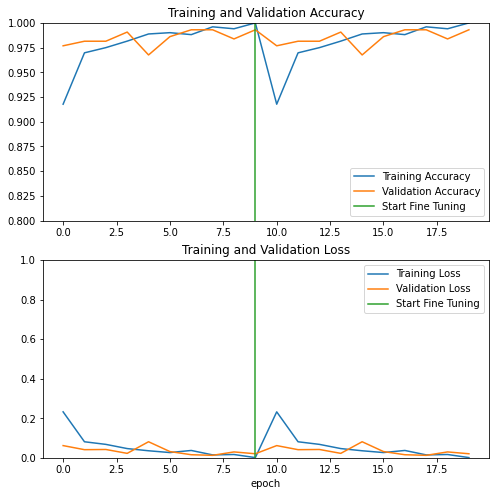

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

first image to print
first image actual label: Potato___Late_blight
1/1 [==============================] - 2s 2s/step
predicted label Potato___Late_blight


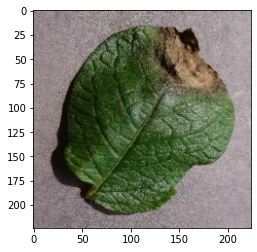

In [ ]:
for image_batch,label_batch in test.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0].numpy()
    print("first image to print")
    plt.imshow(first_image)
    print("first image actual label:",class_names[first_label])
    batch_prediction = model.predict(image_batch)
    print("predicted label",class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img, )
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


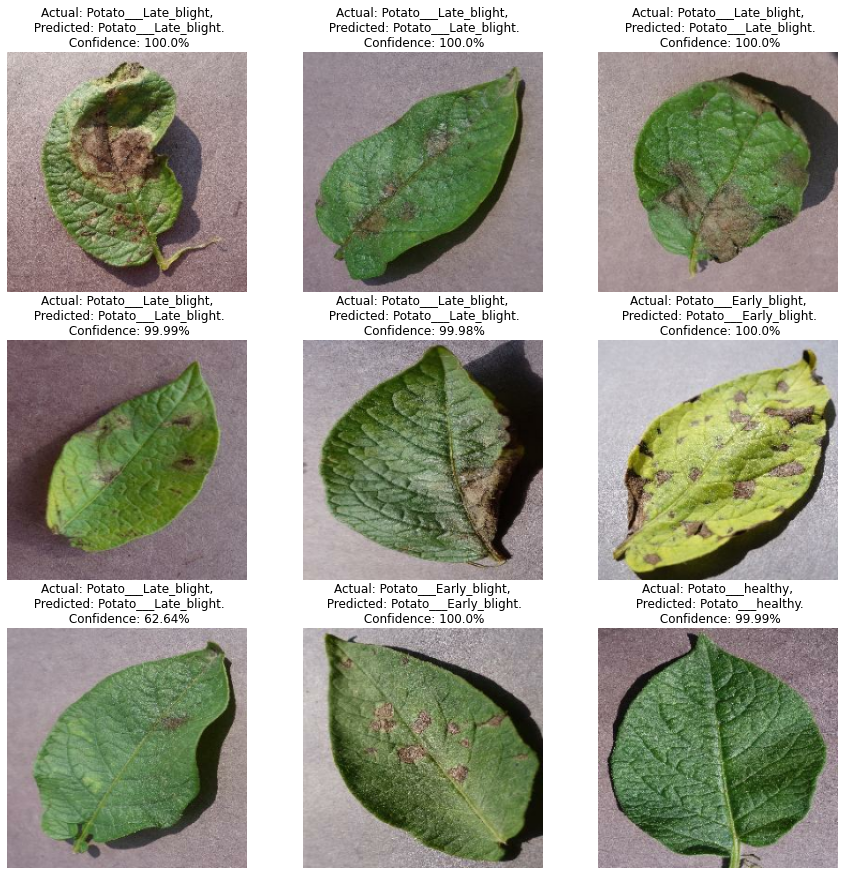

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

In [ ]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)